# Load Iris Data

In [16]:
from sklearn.datasets import load_iris
data = load_iris()
print(f"features: ",  str(data['feature_names']), "\n"
        f"targets: ",  str(data['target_names']))

features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
targets:  ['setosa' 'versicolor' 'virginica']


# Setup Keras with Feedforward

In [84]:
import numpy as np
import keras
from keras import layers
from keras import ops

inputs = keras.Input(shape=(len(data['feature_names']),))
dense = layers.Dense(128, activation="relu")
x = dense(inputs)
outputs = layers.Dense(len(data['target_names']))(x)

def train_evaluate(features, targets,optimizer=keras.optimizers.RMSprop()):
    model = keras.Model(inputs=inputs, outputs=outputs, name="iris_model")
    model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=["accuracy"])
    history=model.fit(features, targets, batch_size=10, epochs=50, validation_split=0.2)
    scoring = model.evaluate(data['data'], data['target'], verbose=2)
    return scoring, history

In [85]:
optimizers = [keras.optimizers.RMSprop(), keras.optimizers.Adam(), keras.optimizers.SGD()]
scores = {}
histories = {}
for opt in optimizers:
    print(f"Training with {opt.get_config()['name']} optimizer")
    score_result,history_result=train_evaluate(data['data'], data['target'], optimizer=opt)
    scores[opt.get_config()['name']] = score_result
    histories[opt.get_config()['name']] = history_result

Training with rmsprop optimizer
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5500 - loss: 0.9211 - val_accuracy: 0.0000e+00 - val_loss: 1.4036
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8250 - loss: 0.7524 - val_accuracy: 0.0000e+00 - val_loss: 1.0577
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8333 - loss: 0.6455 - val_accuracy: 0.0000e+00 - val_loss: 1.1258
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8333 - loss: 0.5791 - val_accuracy: 0.0000e+00 - val_loss: 0.9506
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8500 - loss: 0.5177 - val_accuracy: 0.0000e+00 - val_loss: 0.9453
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8417 - loss: 0.4816 - val_accuracy: 0.3667 - val_loss: 0.7922
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8417 - loss: 0.4471 - val_accuracy: 0.0000e+00 - val_loss: 0.9849
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

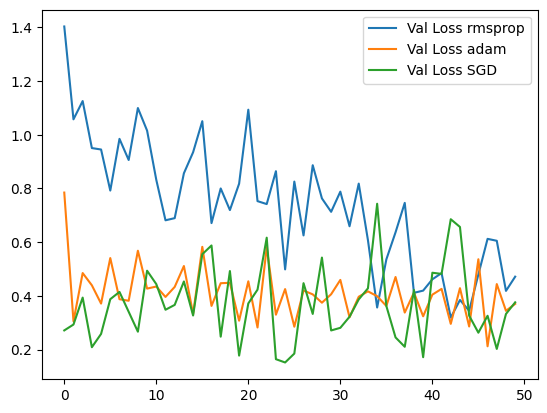

In [ ]:
import matplotlib.pyplot as plt
for opt_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Val Loss {opt_name}')
plt.legend()
plt.show()

In [88]:
# Final Performance
for opt_name, score in scores.items():
    print(f"Final evaluation with {opt_name} optimizer: {score[1]*100:.2f}% accuracy")

Final evaluation with rmsprop optimizer: 93.33% accuracy
Final evaluation with adam optimizer: 94.00% accuracy
Final evaluation with SGD optimizer: 94.00% accuracy


# Commentary

Although they all achieved similar final accuracy, the rmsprop optimizer appears to have taken much longer to converge (somewhere around the 35th epoch). The other optimizers reached peak performance almost right away. To produce better estimates of out of sample error, we'd need to do train/test splits with cross-validation training procedures. The sample code above can overfit the input data and isn't a meaningful model as a result. There are also way more parameters than there are observations, which will essentially gurantee overfitting.